<a href="https://colab.research.google.com/github/mrohit01/Prediction-of-Diabetes-Using-ANN/blob/main/Prediction_of_Diabetes_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing The libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.preprocessing import StandardScaler

In [ ]:
# libraries for our model

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('/content/diabetes.csv') 

In [ ]:
# printing the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
df.shape

(768, 9)

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

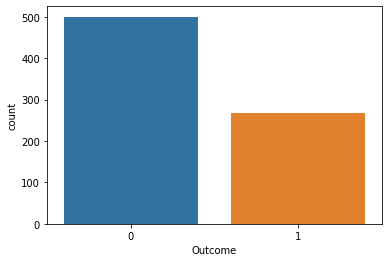

In [ ]:
# plotting the target column 

sns.countplot(x="Outcome",data=df)

In [ ]:
# separating the data and labels
x = df.drop(columns = 'Outcome', axis=1)

y = df['Outcome']

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify=y, 
                                                    random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print("*"*10)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
**********
(614,)
(154,)


In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


In [ ]:
# scaling is requird in the case of ann models so as to reduce the dominations of bigger value on smaller value

# ex. salary vs age

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

In [ ]:
# sequential model are the linearly stacked layers layers of model

# if you wish to change activation function or add layers to model then you can do it

# dropout is use to reduce the interdependecy of neurons on each other

model = Sequential()

model.add(Dense(20,activation="relu",input_dim=8))
model.add(Dense(15,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(9,activation="relu"))
#model.add(Dense(4,activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
# here we are able to see the architecture of the model that we have created

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 9)                 144       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model.layers[0].get_weights()

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [ ]:
# here we have fitted the model with train data 

# we have trained our model for many number of epochs

# with validation split of 0.1 that means 10% of train data is use as the validation 

history = model.fit(x_train_scaled,
                    y_train,
                    verbose=True,
                    batch_size = 32,
                    validation_split=0.1,
                    epochs=100)

Epoch 1/100
18/18 [==============================] - 3s 15ms/step - loss: 0.8314 - accuracy: 0.3569 - val_loss: 0.7298 - val_accuracy: 0.3710
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7520 - accuracy: 0.3659 - val_loss: 0.6807 - val_accuracy: 0.4677
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5254 - val_loss: 0.6534 - val_accuracy: 0.6129
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6681 - accuracy: 0.6413 - val_loss: 0.6314 - val_accuracy: 0.6935
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6466 - accuracy: 0.6866 - val_loss: 0.6084 - val_accuracy: 0.7419
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6193 - accuracy: 0.7174 - val_loss: 0.5853 - val_accuracy: 0.7419
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5939 - accuracy: 0.7391 - val_loss: 0.5610 - val_accuracy: 0.7419
Epoch 8/100


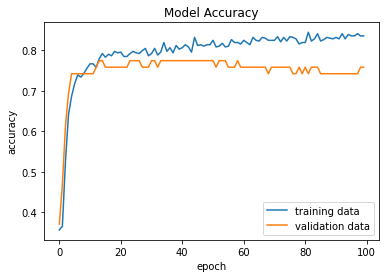

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training data","validation data"],loc="lower right")

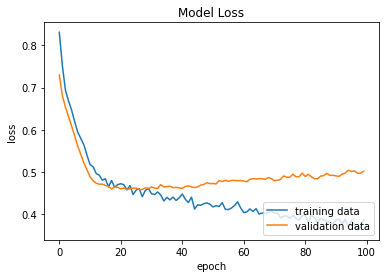

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")

plt.legend(["training data","validation data"],loc="lower right")

In [ ]:
y_log = model.predict(x_test_scaled)

y_pred = np.where(y_log>0.5,1,0)

5/5 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
print("Accuracy score : ",acc)

Accuracy score :  0.7272727272727273


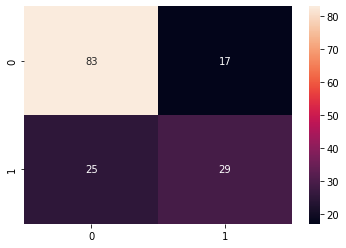

In [ ]:
from sklearn.metrics import confusion_matrix

cnf = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf,annot=True)

In [ ]:
from sklearn.metrics import classification_report

clf = classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       100
           1       0.63      0.54      0.58        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



In [ ]:
x.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47
767,1,93,70,31,0,30.4,0.315,23


In [ ]:
#input_data = (5,166,72,19,175,25.8,0.587,51)
input_data = (5,121,72,23,112,26.2,0.245,30)

# changing the input_data to numpy array
input_data = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshape = input_data.reshape(1,-1)

x_test_scaling = scaler.transform(input_data_reshape)

prediction = model.predict(x_test_scaling)
y_pred = np.where(prediction>0.5,1,0)

if (y_pred[0][0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

1/1 [==============================] - 0s 17ms/step
The person is not diabetic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename_sc = "scaler.pkl"
pickle.dump(scaler, open(filename_sc,'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
# loading the standard scalar object 
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))

In [ ]:
input_data = (5,121,72,23,112,26.2,0.245,30)

# changing the input_data to numpy array
input_data = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshape = input_data.reshape(1,-1)

x_test_scaling = loaded_scaler.transform(input_data_reshape)

prediction = loaded_model.predict(x_test_scaling)
y_pred = np.where(prediction>0.5,1,0)

if (y_pred[0][0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

1/1 [==============================] - 0s 53ms/step
The person is not diabetic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
!pip install keras
!pip install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=f64b9d4c015a35f631e3e9f95a7be756efc80027777277ac7804edfadfa22a6e
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann-visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ann_visualizer.visualize import ann_viz

ann_viz(model)

In [ ]:
#  pip install Flask-RESTful

In [ ]:
!pip install -q streamlit

     |████████████████████████████████| 9.2 MB 5.6 MB/s 
     |████████████████████████████████| 184 kB 60.5 MB/s 
     |████████████████████████████████| 237 kB 59.7 MB/s 
     |████████████████████████████████| 4.7 MB 57.5 MB/s 
     |████████████████████████████████| 78 kB 8.0 MB/s 
     |████████████████████████████████| 164 kB 75.0 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 51 kB 7.8 MB/s 


In [ ]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
%%writefile app.py

import numpy as np
import pickle
import streamlit as st

# loading the saved model
loaded_model = pickle.load(open('/content/trained_model.sav', 'rb'))

# loading the standard scalar object 
loaded_scalar = pickle.load(open('/content/scaler.pkl', 'rb'))

def diabetes_prediction(input_data):
    # changing the input_data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    x_test_scaling = loaded_scalar.transform(input_data_reshaped)

    prediction = loaded_model.predict(x_test_scaling)
    y_pred = np.where(prediction>0.5,1,0)

    if (y_pred[0][0] == 0):
        print('The person is not diabetic')
    else:
        print('The person is diabetic')


def main():
    
    
    # giving a title
    st.title('Diabetes Prediction Web App')
    
    
    # getting the input data from the user
    
    
    Pregnancies = st.text_input('Number of Pregnancies')
    Glucose = st.text_input('Glucose Level')
    BloodPressure = st.text_input('Blood Pressure Value')
    SkinThickness = st.text_input('Skin Thickness value')
    Insulin = st.text_input('Insulin Level')
    BMI = st.text_input('BMI Value')
    DiabetesPedigreeFunction = st.text_input('Diabetes Pedigree Function Value')
    Age = st.text_input('Age of the Person')
    
    
    # code for Prediction
    diagnosis = ''
    
    # creating a button for Prediction
    
    if st.button('Diabetes Test Result'):
        diagnosis = diabetes_prediction([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age])
        
        
    st.success(diagnosis)


    
if __name__ == '__main__':
    main()
    

Writing app.py


In [ ]:
pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 761 kB 7.3 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=0f1a6b65f65a3c5d35611b6c5de2173369cfdc5e7fc63ea463953daf12f8d819
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [ ]:
pip install protobuf==3.20.*


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.7 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [ ]:
#docker run -it python:3.10 /bin/bash
# Within the Docker container:
!pip3 install google-cloud-logging==3.1.1 protobuf==4.21.0
!python3 -c "import google.cloud.logging"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 188 kB 6.6 MB/s 
     |████████████████████████████████| 407 kB 62.7 MB/s 
Reason for being yanked: Required python version not configured correctly (https://github.com/protocolbuffers/protobuf/issues/10076)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.0 which is incompatible.
tensorflow-metadata 1.12.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.0 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.0 which is incompatible.
strea

In [ ]:
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

In [ ]:
pip install --upgrade "protobuf<=3.20.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.9 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.0
    Uninstalling protobuf-4.21.0:
      Successfully uninstalled protobuf-4.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
googleapis-common-protos 1.57.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-translate 3.8.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<

In [ ]:
!pip install 'protobuf<=3.20.1' --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.20.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
googleapis-common-protos 1.57.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-translate 3.8.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] | loadDep:strip-ansi: sill resolveWithNewModule strip-ansi


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.83.91.121:8501

npx: installed 22 in 3.415s
your url is: https://tangy-parrots-float-34-83-91-121.loca.lt
2022-12-30 11:10:15.937118: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
  Stopping...
^C
